# Decision tree 

## Issue : Comprendre tout le procéder d'un arbres de décision.

### Librairies

In [31]:
import numpy as np
import pandas as pd

# load iris dataset
from sklearn.datasets import load_iris

# import tree model
from sklearn import tree
from sklearn.tree import export_text


# data viz 
import matplotlib.pyplot as plt
import seaborn as sns

# selection features target and split dataset training and testing split
from sklearn.model_selection import train_test_split

# Get iris data for exemple

In [3]:
iris = load_iris()

# Split data training and testing 

In [4]:
# X = features , y = target
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Comprendre la structure d'un arbre de décision

https://scikit-learn.org/stable/modules/tree.html#classification

### Analyse de la structure de l'arbre de décision pour comprendre la relation entre les caractéristiques et la cible à prédire. 


Dans cet exemple, on récupére :

  - *L'arborescence binaire*

  - *La profondeur de chaque noeud et s'il s'agit ou non d'une feuille* 

  - *Les nœuds qui ont été atteints par un échantillon à l'aide de la `decision_path` méthode*

  - *La feuille qui a été atteinte par un échantillon à l'aide de la méthode `apply`*

  - *Les règles qui ont été utilisées pour prédire un échantillon* 

  - *Le chemin de décision partagé par un groupe d'échantillons*

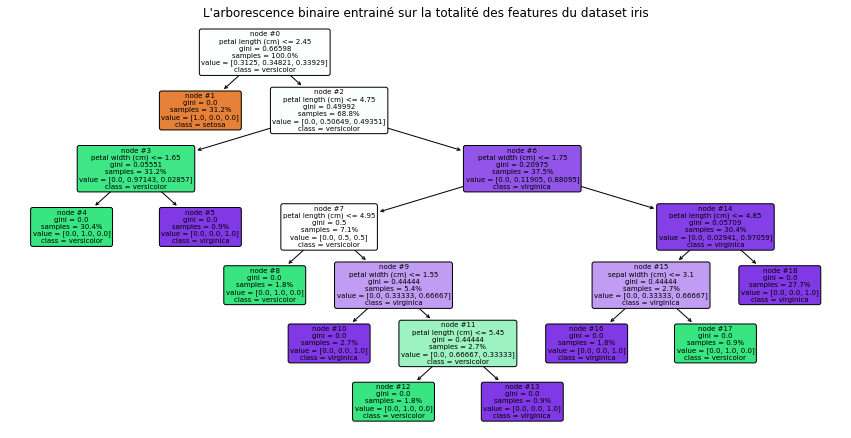

In [5]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

plt.figure(figsize=(15, 7.5))

tree.plot_tree(clf, # model d'arbre de décision
               node_ids=True, # id de chaques noeud
               filled=True, # remplissage des noeuds avec des couleurs en fonction de la prédiction de classe 
               feature_names=iris.feature_names, # noms des features
               class_names=iris.target_names, # noms des target
               proportion=True, # nbr d'echantillons du dataset en pourcentage 
               rounded=True, # style de la visualisation
               precision=5 # précision decimale sur toutes les valeurs numériques 
               )
plt.title("L'arborescence binaire entrainé sur la totalité des features du dataset iris")
plt.savefig("arborescence_binaire.png")
plt.show()

On retrouve 50 setosa <= 2.45 cm sur la hauteur des pétales
On retrouve 50 versicolor > de 2.45 cm sur la hauteur des pétales
On retrouve 50 virginica > de 2.45 cm sur la hauteur des pétales



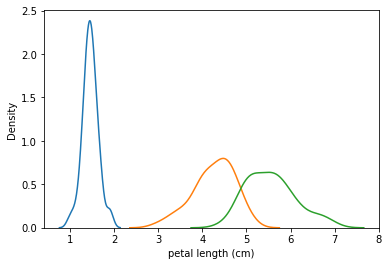

In [51]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
setosa = 0
versicolor = 0
virginica = 0
for x, y in data.iterrows():
  
  # en dessous de 2.45
  if y["petal length (cm)"] <= 2.45:
    if y['target'] == 0:
        setosa += 1

  # au dessus de 2.45
  else:
    if y['target'] == 1:
      versicolor += 1
    
    if y['target'] == 2:
      virginica += 1

print("On retrouve " + str(setosa) + " setosa <= 2.45 cm sur la hauteur des pétales")
print("On retrouve " + str(versicolor) + " versicolor > de 2.45 cm sur la hauteur des pétales")
print("On retrouve " + str(virginica) + " virginica > de 2.45 cm sur la hauteur des pétales")
print("")
sns.kdeplot(data.loc[data['target'] == 0, 'petal length (cm)'])
sns.kdeplot(data.loc[data['target'] == 1, 'petal length (cm)'])
sns.kdeplot(data.loc[data['target'] == 2, 'petal length (cm)'])

### Tracez des surfaces de décision des arbres formés sur l'ensemble des données sous forme de pair des 3 target

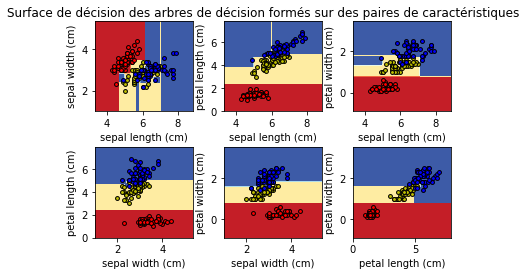

In [7]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Surface de décision des arbres de décision formés sur des paires de caractéristiques")
_ = plt.axis("tight")
plt.savefig("arborescence_binaire.png")




### Construisez un rapport texte montrant les règles d'un arbre de décision.

In [8]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [9]:
print(export_text(clf, feature_names=['petal width (cm)', 'petal length (cm)']))


|--- petal length (cm) <= 0.80
|   |--- class: 0
|--- petal length (cm) >  0.80
|   |--- petal length (cm) <= 1.75
|   |   |--- petal width (cm) <= 4.95
|   |   |   |--- petal length (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  4.95
|   |   |   |--- petal length (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  1.55
|   |   |   |   |--- petal width (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal width (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal length (cm) >  1.75
|   |   |--- petal width (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal width (cm) >  4.85
|   |   |   |--- class: 2

